In [ ]:
!pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg

In [ ]:
df_con = pd.read_csv("/content/drive/MyDrive/2024-2/!행정/졸업논문/control.csv")
df_trt = pd.read_csv("/content/drive/MyDrive/2024-2/!행정/졸업논문/treatment.csv")
new_names = [f"{a}_{b}" for a in ["특정", "광장", "범불안", "사회", "공황"] for b in ["이해", "공감", "개선", "자연"]]
df_con = df_con.iloc[:, 1:24]
df_con.columns = ["참여자번호", "성별", "나이"] + new_names
df_con["집단"] = "통제"

df_trt = df_trt.iloc[:, 1:24]
df_trt.columns = ["참여자번호", "성별", "나이"] + new_names
df_trt["집단"] = "실험"

for a in ["이해", "공감", "개선", "자연"]:
  df_con[f"평균_{a}"] = (df_con[f"특정_{a}"] + df_con[f"광장_{a}"] + df_con[f"범불안_{a}"] + df_con[f"사회_{a}"] + df_con[f"공황_{a}"])
  df_trt[f"평균_{a}"] = (df_trt[f"특정_{a}"] + df_trt[f"광장_{a}"] + df_trt[f"범불안_{a}"] + df_trt[f"사회_{a}"] + df_trt[f"공황_{a}"])

df_all = pd.concat([df_con, df_trt])
df_all = df_all.reset_index(drop=True)
df_all

,참여자번호,성별,나이,특정_이해,특정_공감,특정_개선,특정_자연,광장_이해,광장_공감,광장_개선,...,사회_자연,공황_이해,공황_공감,공황_개선,공황_자연,집단,평균_이해,평균_공감,평균_개선,평균_자연
0,5,남성,25,4,3,4,1,4,2,3,...,1,3,2,3,1,통제,17,11,17,5
1,3,여성,24,4,3,2,2,5,5,4,...,4,4,3,3,3,통제,22,20,18,16
2,11,남성,24,5,2,2,4,2,2,2,...,5,3,1,2,4,통제,17,10,13,21
3,1,남성,25,6,5,6,3,5,4,6,...,3,3,3,3,3,통제,26,22,25,15
4,15,남성,24,6,4,3,4,6,5,5,...,4,6,4,4,4,통제,30,22,21,20
5,13,남성,26,5,4,2,2,5,4,2,...,1,4,3,2,1,통제,22,18,12,11
6,17,여성,24,6,5,5,4,5,5,4,...,3,6,5,6,6,통제,28,25,25,22
7,9,여성,24,3,2,2,2,4,4,4,...,2,1,2,1,1,통제,17,15,14,14
8,19,여성,24,4,2,1,2,4,3,2,...,1,3,1,1,1,통제,19,11,9,9
9,21,여성,16,5,5,4,3,4,4,3,...,3,3,3,4,2,통제,21,18,18,16


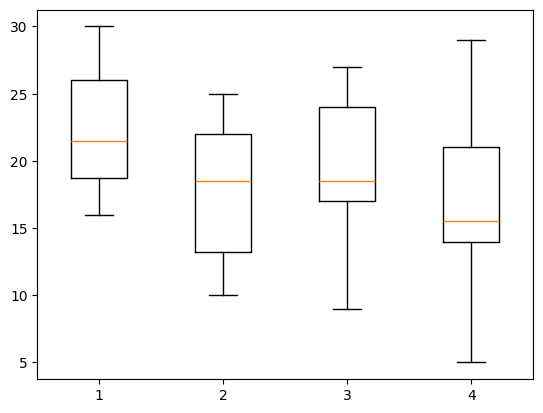

In [153]:
import matplotlib.pyplot as plt
plt.boxplot(df_all[["평균_이해", "평균_공감", "평균_개선", "평균_자연"]])
plt.show()

In [154]:
print(df_all["성별"].value_counts())
print(df_all["나이"].mean())
print(df_all["나이"].std())

성별
남성    15
여성     9
Name: count, dtype: int64
23.708333333333332
1.899179838238342


In [155]:
pg.ttest(dup_trt["평균_개선"], dup_con["평균_개선"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.644073,46,two-sided,0.011166,"[0.86, 6.31]",0.763278,4.462,0.735185


In [158]:
def create_table(df_con, df_trt):
  results_list = []
  for idx in new_names + ["평균_이해", "평균_공감", "평균_개선", "평균_자연"]:
    results = dict()
    results["변수명"] = idx
    results["실험_평균"] = df_trt[idx].mean().round(3)
    results["실험_오차"] = df_trt[idx].sem().round(3)
    results["통제_평균"] = df_con[idx].mean().round(3)
    results["통제_오차"] = df_con[idx].sem().round(3)

    t_test = pg.ttest(df_trt[idx], df_con[idx], correction=True)

    results["t"] = t_test["T"].iloc[0].round(3)
    results["p"] = t_test["p-val"].iloc[0].round(3)
    results["d"] = t_test["cohen-d"].iloc[0].round(3)
    results["sig"] = "*" if t_test["p-val"].iloc[0] < 0.05 else ""

    results_list.append(results)

  results_table = pd.DataFrame(results_list)
  return results_table

results_table = create_table(df_con, df_trt)

In [159]:
results_table[results_table["변수명"].str.contains("이해")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
0,특정_이해,4.000,0.492,4.833,0.271,-1.483,0.156,0.606,
4,광장_이해,4.417,0.288,4.667,0.333,-0.568,0.576,0.232,
8,범불안_이해,4.250,0.446,4.917,0.336,-1.194,0.246,0.487,
12,사회_이해,4.583,0.229,4.500,0.359,0.196,0.847,0.080,
16,공황_이해,4.667,0.225,3.750,0.446,1.836,0.085,0.749,
20,평균_이해,21.917,1.258,22.667,1.339,-0.408,0.687,0.167,


In [160]:
results_table[results_table["변수명"].str.contains("공감")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
1,특정_공감,3.250,0.411,3.500,0.337,-0.471,0.643,0.192,
5,광장_공감,3.750,0.351,3.917,0.313,-0.355,0.726,0.145,
9,범불안_공감,3.667,0.396,3.583,0.398,0.148,0.883,0.061,
13,사회_공감,3.750,0.429,3.500,0.379,0.437,0.667,0.178,
17,공황_공감,3.833,0.386,2.833,0.386,1.832,0.081,0.748,
21,평균_공감,18.250,1.634,17.333,1.427,0.423,0.677,0.173,


In [161]:
results_table[results_table["변수명"].str.contains("개선")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
2,특정_개선,3.583,0.313,3.167,0.458,0.751,0.461,0.307,
6,광장_개선,4.333,0.310,3.750,0.411,1.134,0.270,0.463,
10,범불안_개선,4.750,0.218,4.500,0.417,0.531,0.602,0.217,
14,사회_개선,4.417,0.358,3.167,0.441,2.201,0.039,0.898,*
18,공황_개선,4.167,0.297,3.083,0.417,2.116,0.047,0.864,*
22,평균_개선,21.250,1.016,17.667,1.676,1.829,0.084,0.747,


In [162]:
results_table[results_table["변수명"].str.contains("자연")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
3,특정_자연,2.917,0.417,2.667,0.284,0.496,0.626,0.202,
7,광장_자연,3.750,0.351,3.083,0.288,1.470,0.156,0.600,
11,범불안_자연,3.750,0.411,3.750,0.351,0.000,1.000,0.000,
15,사회_자연,4.083,0.417,2.667,0.376,2.524,0.019,1.030,*
19,공황_자연,3.750,0.351,2.583,0.484,1.952,0.065,0.797,
23,평균_자연,18.250,1.577,14.750,1.420,1.649,0.113,0.673,


In [163]:
dup_con = pd.concat([df_con]*2, ignore_index=True)
dup_trt = pd.concat([df_trt]*2, ignore_index=True)
dup_table = create_table(dup_con, dup_trt)

In [164]:
dup_table[dup_table["변수명"].str.contains("이해")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
0,특정_이해,4.000,0.341,4.833,0.187,-2.145,0.039,0.619,*
4,광장_이해,4.417,0.199,4.667,0.231,-0.821,0.416,0.237,
8,범불안_이해,4.250,0.308,4.917,0.232,-1.726,0.092,0.498,
12,사회_이해,4.583,0.158,4.500,0.248,0.283,0.779,0.082,
16,공황_이해,4.667,0.155,3.750,0.308,2.654,0.012,0.766,*
20,평균_이해,21.917,0.870,22.667,0.926,-0.590,0.558,0.170,


In [165]:
dup_table[dup_table["변수명"].str.contains("공감")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
1,특정_공감,3.250,0.284,3.500,0.233,-0.681,0.500,0.196,
5,광장_공감,3.750,0.243,3.917,0.216,-0.513,0.611,0.148,
9,범불안_공감,3.667,0.274,3.583,0.275,0.215,0.831,0.062,
13,사회_공감,3.750,0.296,3.500,0.262,0.632,0.531,0.182,
17,공황_공감,3.833,0.267,2.833,0.267,2.649,0.011,0.765,*
21,평균_공감,18.250,1.130,17.333,0.987,0.611,0.544,0.176,


In [166]:
dup_table[dup_table["변수명"].str.contains("개선")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
2,특정_개선,3.583,0.216,3.167,0.317,1.087,0.284,0.314,
6,광장_개선,4.333,0.214,3.750,0.284,1.640,0.108,0.473,
10,범불안_개선,4.750,0.150,4.500,0.289,0.768,0.448,0.222,
14,사회_개선,4.417,0.248,3.167,0.305,3.182,0.003,0.919,*
18,공황_개선,4.167,0.206,3.083,0.288,3.060,0.004,0.883,*
22,평균_개선,21.250,0.703,17.667,1.159,2.644,0.012,0.763,*


In [167]:
dup_table[dup_table["변수명"].str.contains("자연")]

,변수명,실험_평균,실험_오차,통제_평균,통제_오차,t,p,d,sig
3,특정_자연,2.917,0.288,2.667,0.197,0.717,0.478,0.207,
7,광장_자연,3.750,0.243,3.083,0.199,2.125,0.039,0.613,*
11,범불안_자연,3.750,0.284,3.750,0.243,0.000,1.000,0.000,
15,사회_자연,4.083,0.288,2.667,0.260,3.650,0.001,1.054,*
19,공황_자연,3.750,0.243,2.583,0.335,2.822,0.007,0.815,*
23,평균_자연,18.250,1.091,14.750,0.982,2.385,0.021,0.688,*
